In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Preprocessing

### Axial Angle vs. Powers and Deflecions in Other Directions

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast.csv')

### Axial Anglular Velocity vs. Powers and Deflecions in Other Directions

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_2.csv')

### ABS(Axial Anglular Velocity) vs. Powers and Deflecions in Other Directions

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_3.csv')

### ABS(Axial Anglular Velocity) vs. Total Power and Deflecions in Other Directions

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_4.csv')

### ABS(Axial Anglular Velocity) vs. (1 + Deflecions in Other Directions) * Total Power

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_5.csv')

### ABS(Axial Anglular Velocity) vs. (1 + Deflecions in Other Directions) * Total Force

In [288]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_6.csv')

### Prediction set

In [289]:
data_pred = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_pred.csv')

# Smoothing noisy data

In [290]:
def smoothTriangle(data, degree):
    smooth = []
    length = len(data)
    for i in range(0,degree):
        average = sum(data[i:i+degree])/degree
        smooth.append(average)
    for i in range(degree,length-degree):
        average = sum(data[i-degree:i+degree])/(2*degree)
        smooth.append(average)
    for i in range(length-degree,length):
        average = sum(data[i-degree:i])/degree
        smooth.append(average)
    return smooth
degree = 120

In [291]:
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]
df_pred = data_pred.iloc[:,1:]

In [292]:
df_x = df_x.values 

In [293]:
df_y = df_y.values

In [294]:
df_pred = df_pred.values

In [295]:
scaler = StandardScaler().fit(df_x)
x_scaled = scaler.transform(df_x)
pred_scaled = scaler.transform(df_pred)

In [296]:
x_smooth = np.zeros(df_x.shape)
for i in range(df_x.shape[1]):
    column = df_x[:,i]
    x_smooth[:,i] = smoothTriangle(column, degree)
pred_smooth = np.zeros(df_pred.shape)
for i in range(df_pred.shape[1]):
    column = df_pred[:,i]
    pred_smooth[:,i] = smoothTriangle(column, degree)

(0, 200)

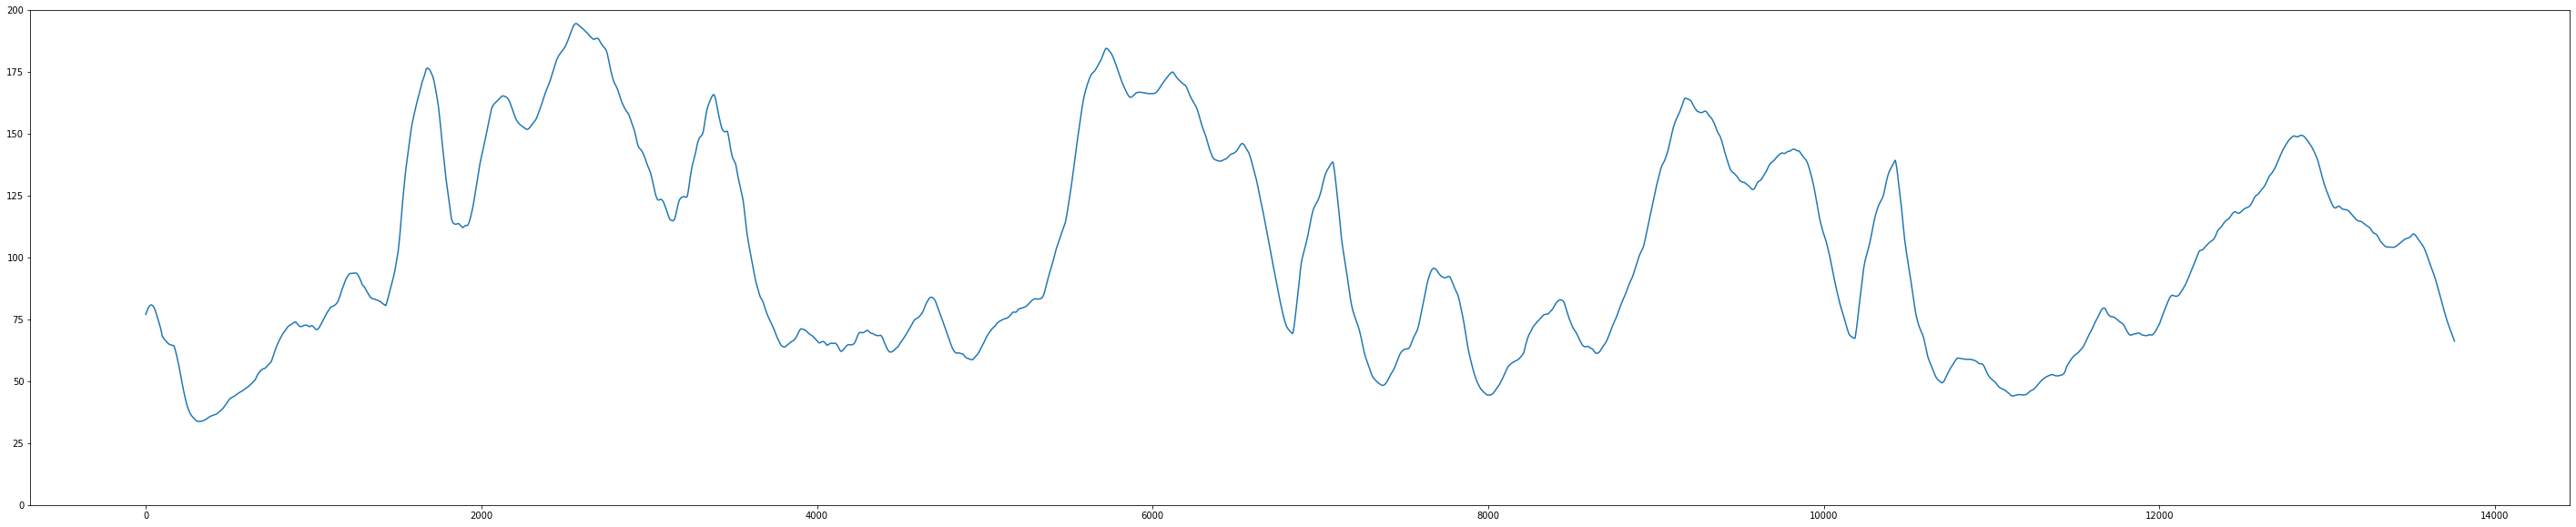

In [300]:
plt.figure(figsize=(50, 10))
plt.plot(x_smooth[degree:-degree,0])
plt.ylim(0, 200)

(0, 200)

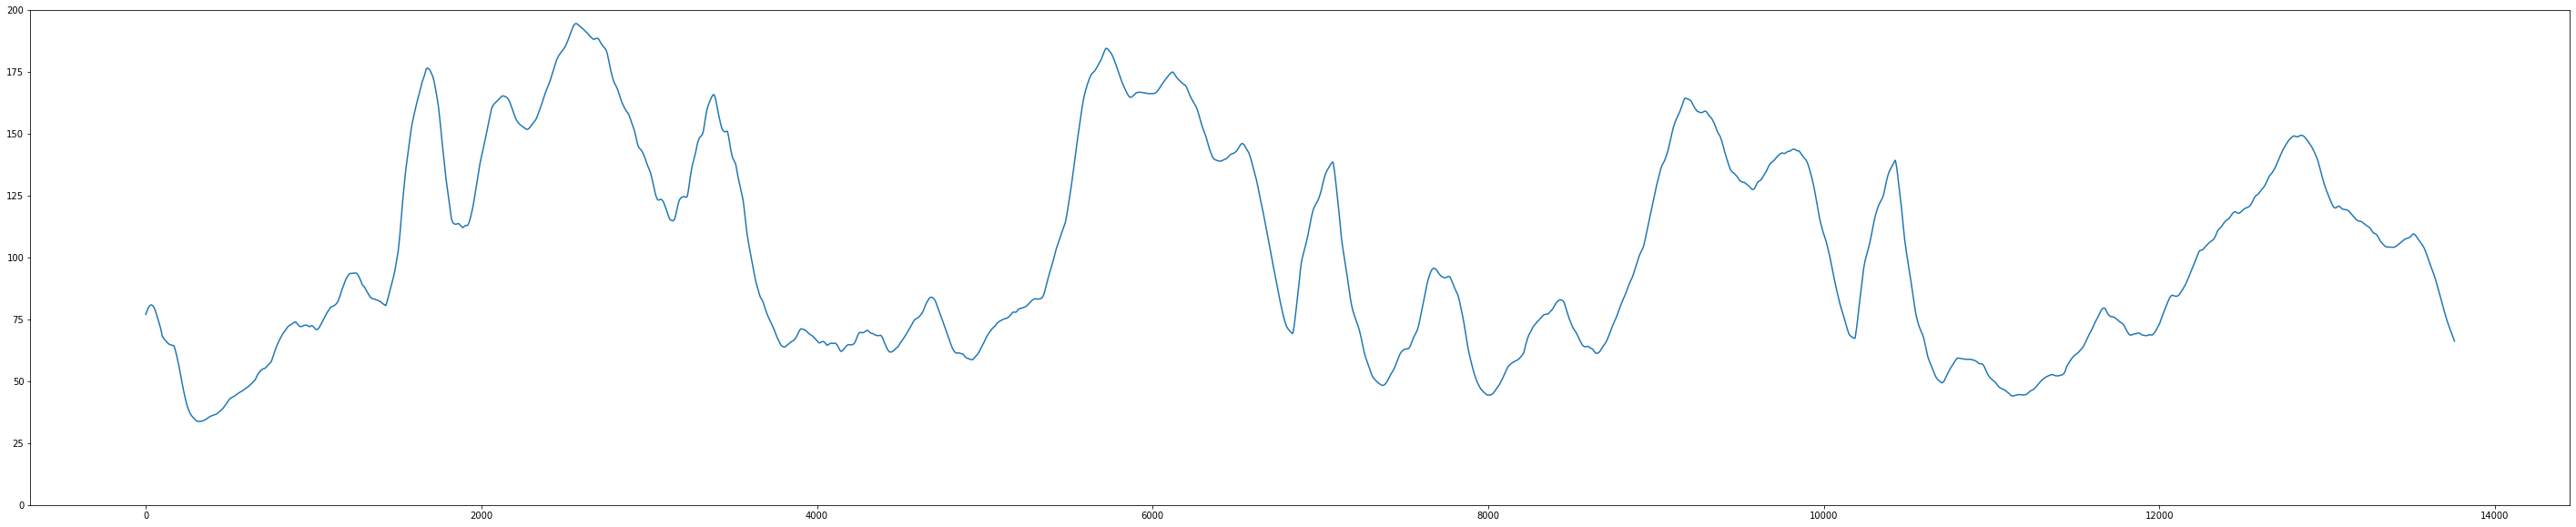

In [302]:
plt.figure(figsize=(50, 10))
plt.plot(pred_smooth[degree:-degree,0])
plt.ylim(0, 200)

(0, 200)

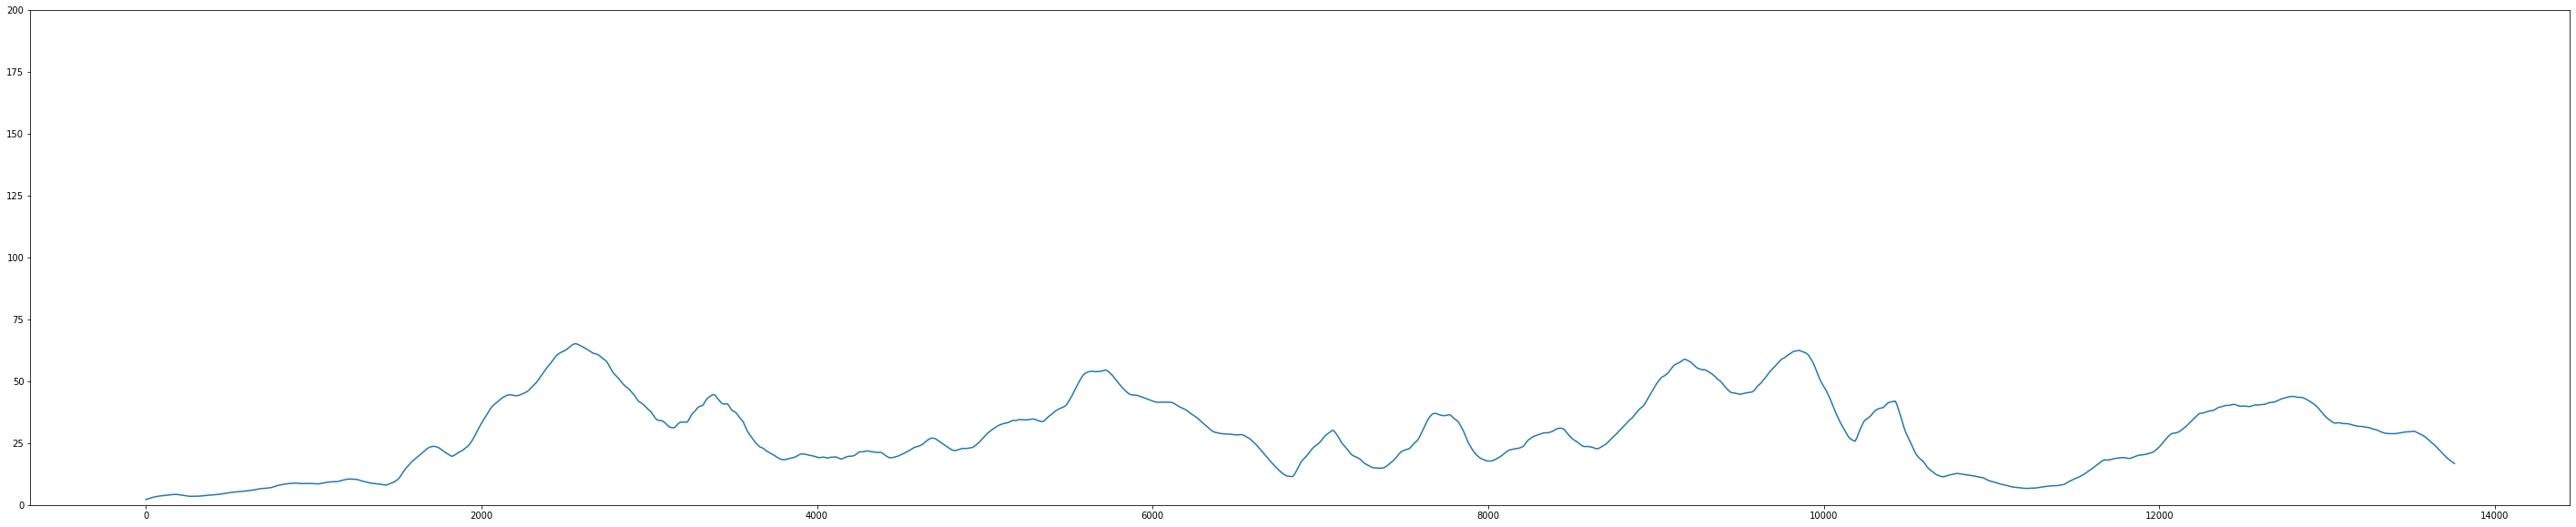

In [304]:
plt.figure(figsize=(50, 10))
plt.plot(x_smooth[degree:-degree,1])
plt.ylim(0, 200)

(0, 200)

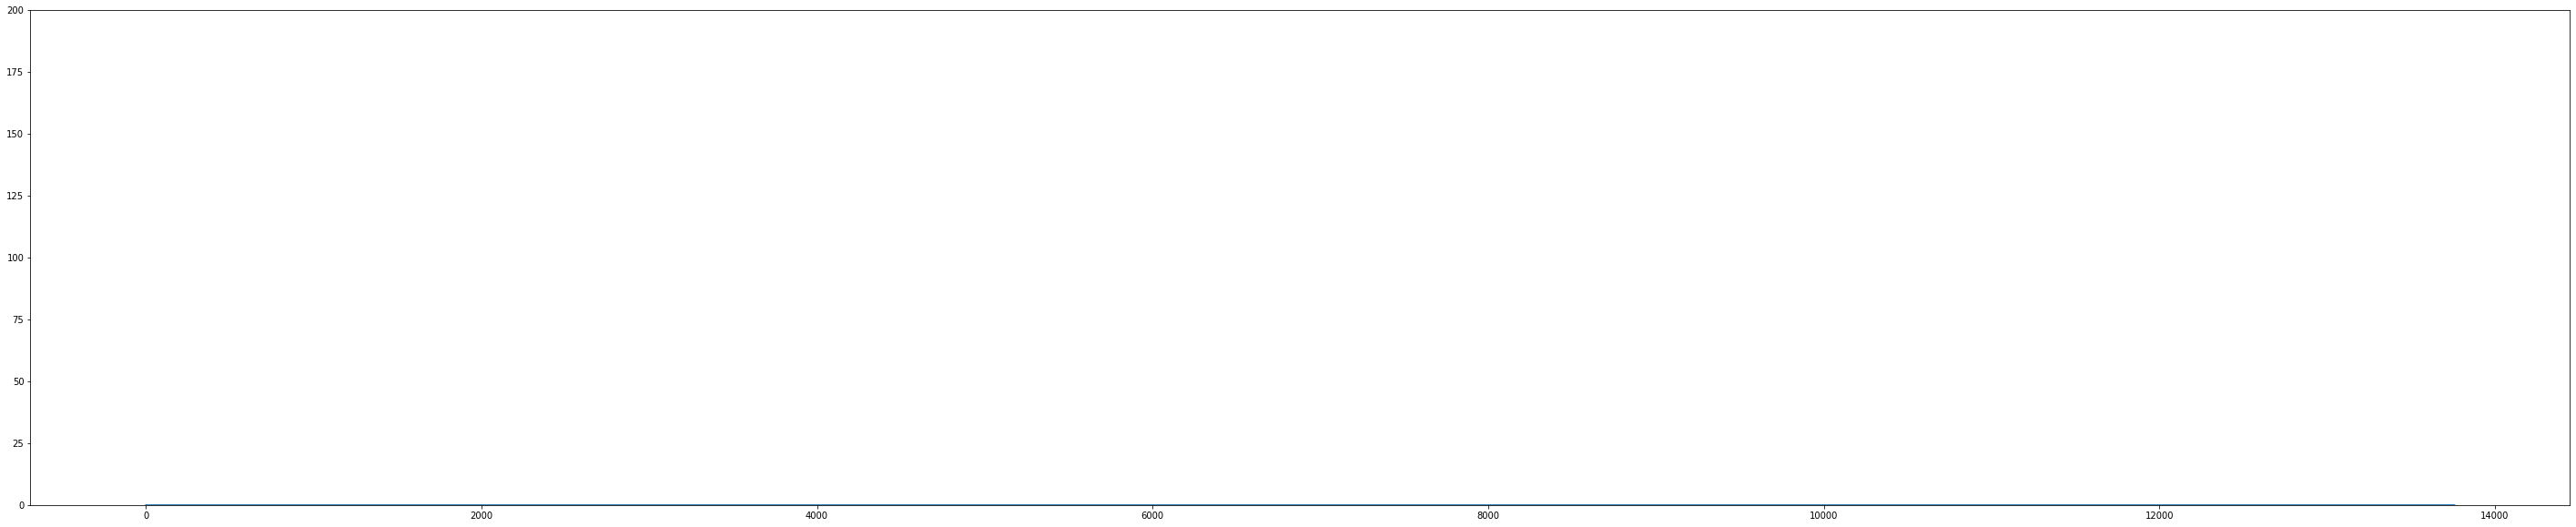

In [305]:
plt.figure(figsize=(50, 10))
plt.plot(pred_smooth[degree:-degree,1])
plt.ylim(0, 200)

(0, 200)

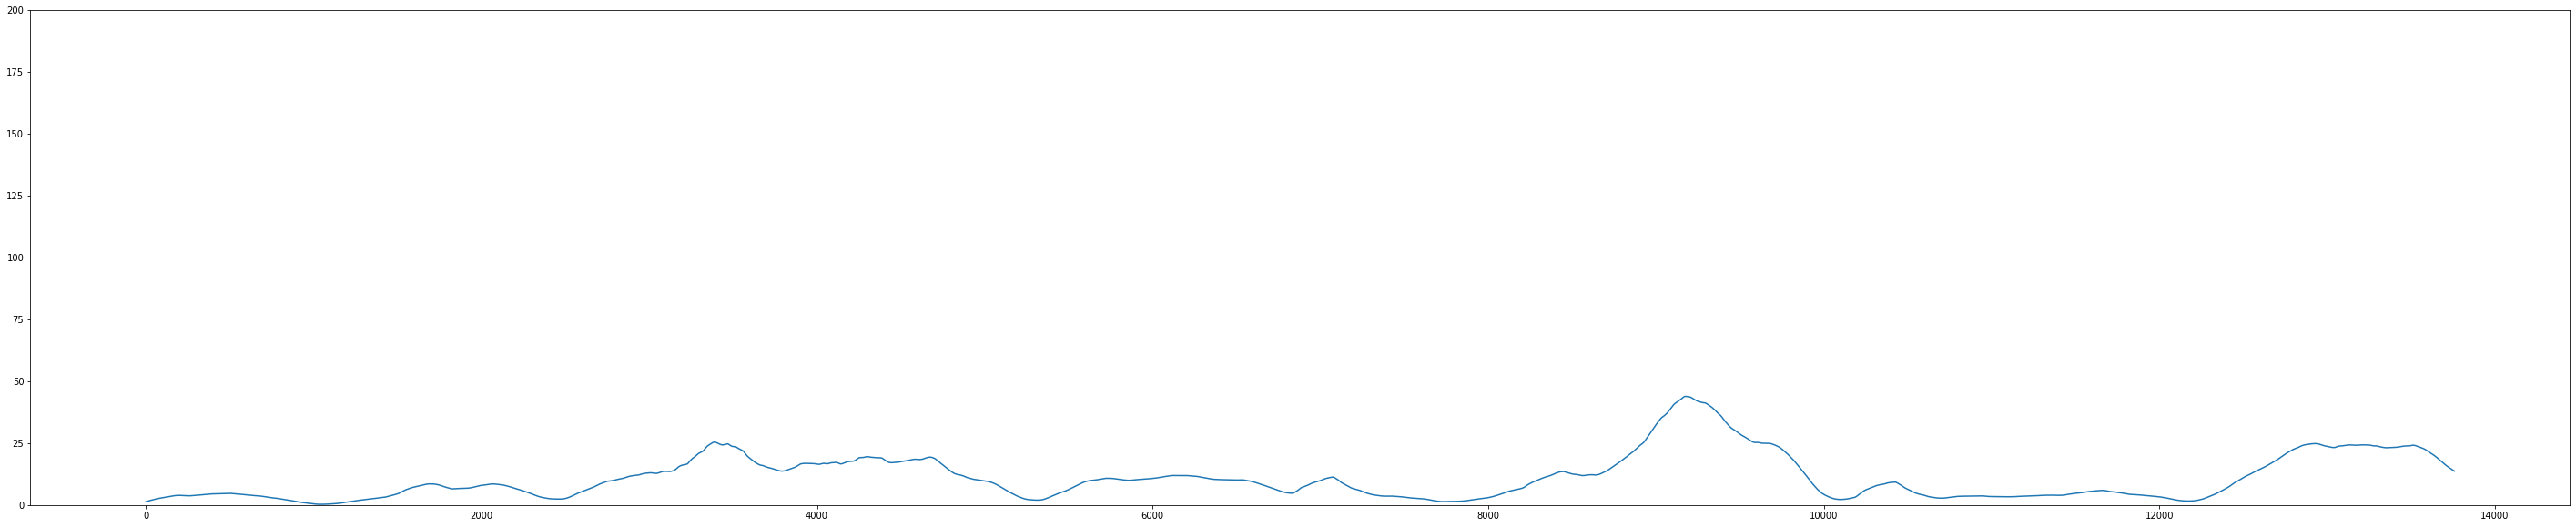

In [307]:
plt.figure(figsize=(50, 10))
plt.plot(x_smooth[degree:-degree,2])
plt.ylim(0, 200)

In [308]:
total = [0]*len(df_y)
for i in range(len(df_y)):
    total[i] = x_smooth[i,0] + x_smooth[i,1] + x_smooth[i,2]

In [309]:
df_x_smooth = pd.DataFrame(x_smooth[degree:-degree,:])
pred_x_smooth = pd.DataFrame(pred_smooth[degree:-degree,:])
pred_x_smooth

,0,1,2
0,77.024472,0.0,0.0
1,77.237837,0.0,0.0
2,77.442467,0.0,0.0
3,77.641347,0.0,0.0
4,77.834625,0.0,0.0
...,...,...,...
13755,66.973868,0.0,0.0
13756,66.787316,0.0,0.0
13757,66.600742,0.0,0.0
13758,66.414194,0.0,0.0


In [310]:
y_smooth = smoothTriangle(df_y, degree)
for i in range(len(y_smooth)):
    y_smooth[i] = 5000*y_smooth[i]

(-5, 8)

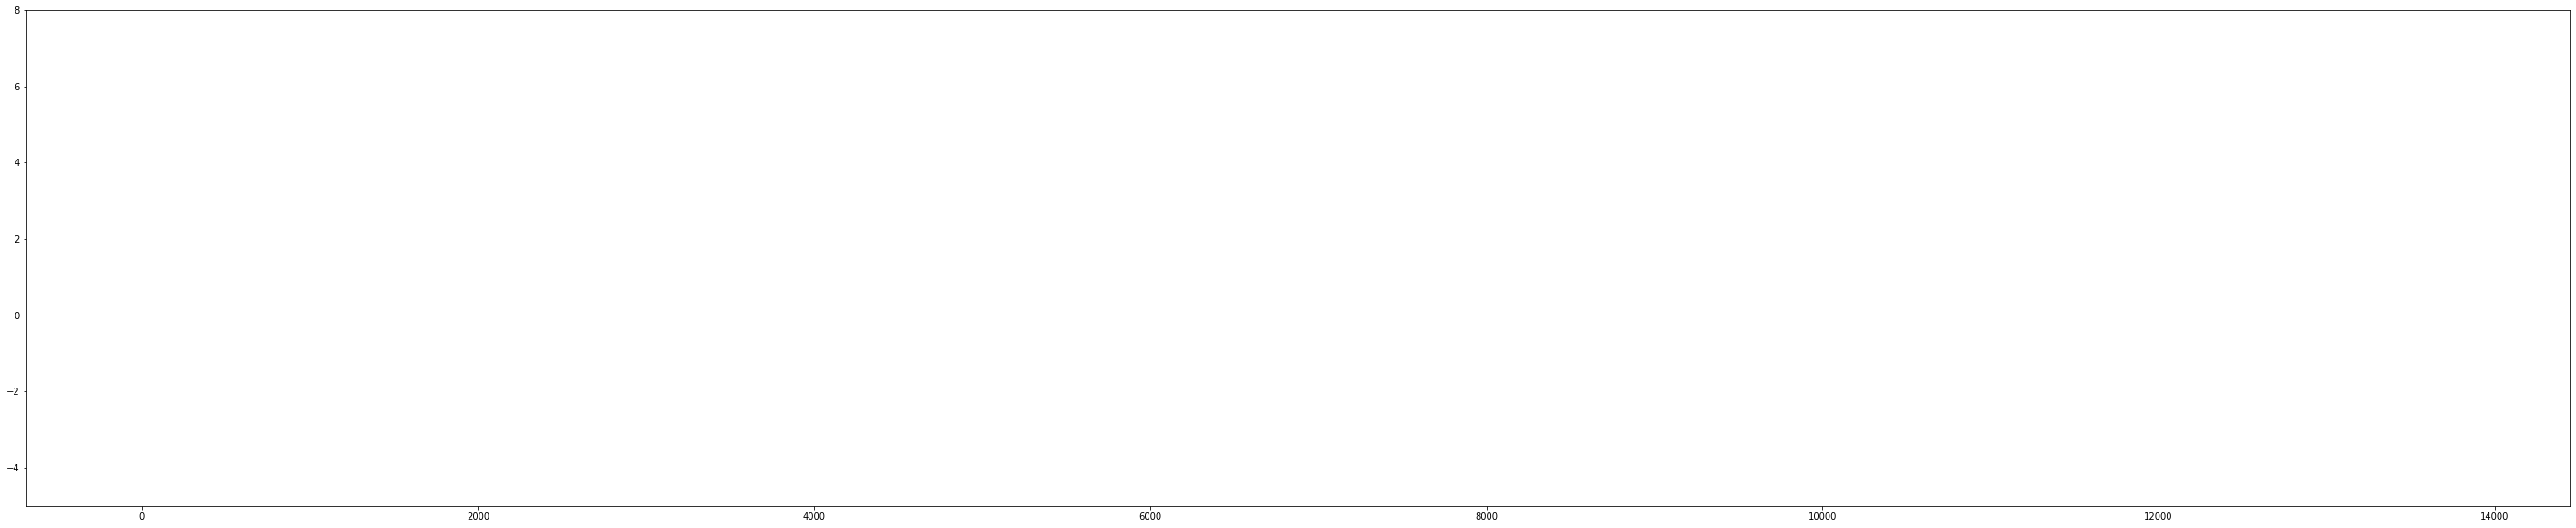

In [311]:
plt.figure(figsize=(50, 10))
plt.plot(total[degree:-degree])
plt.ylim(-5, 8)

(0, 10)

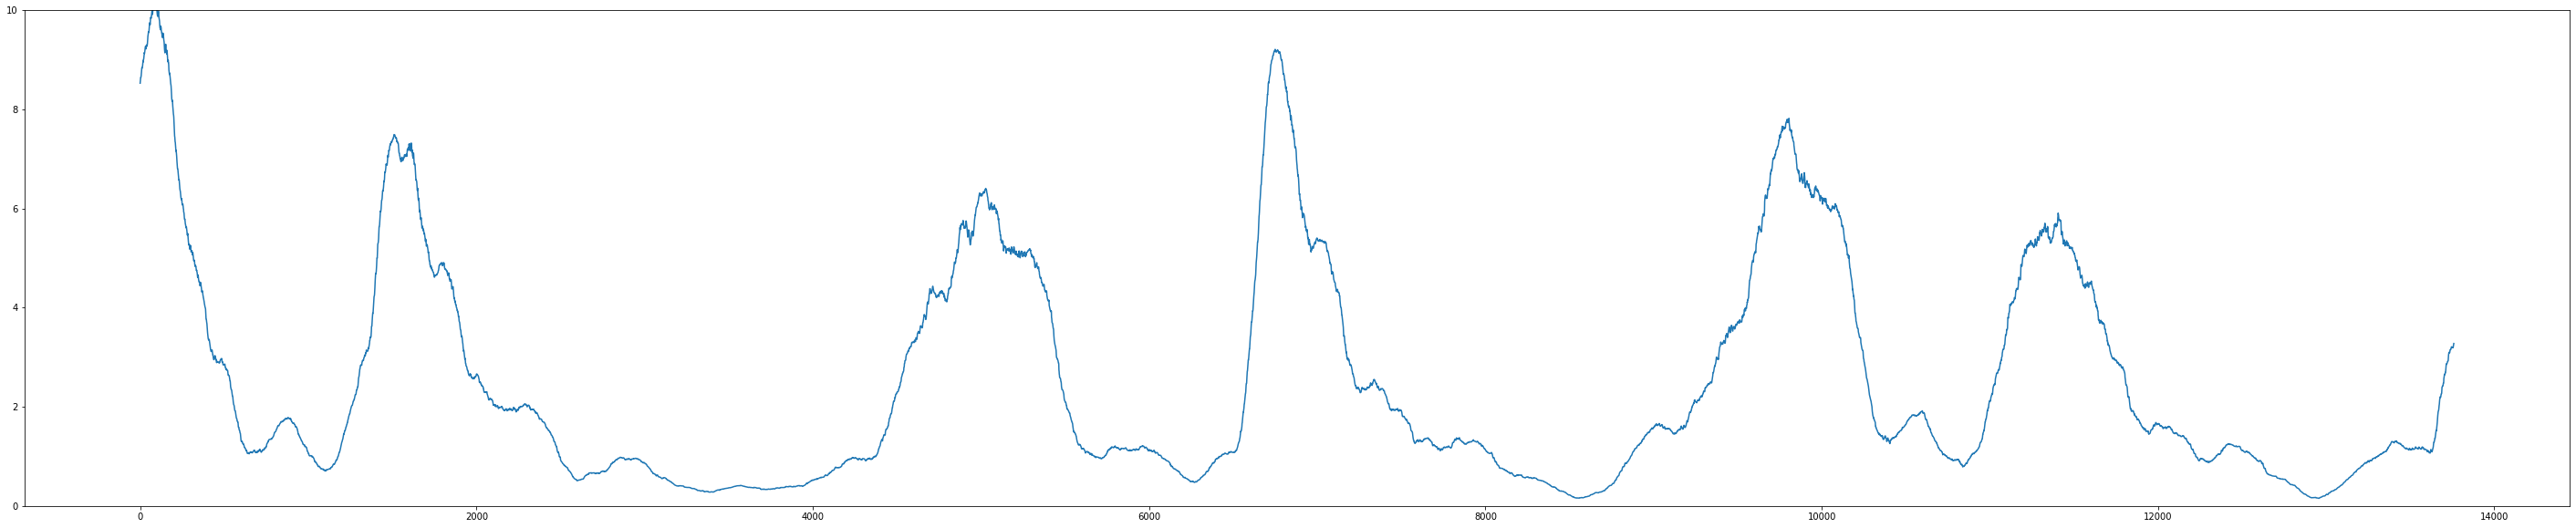

In [344]:
plt.figure(figsize=(50, 10))
plt.plot(y_smooth[degree:-degree])
plt.ylim(0, 10)

(0, 0.006)

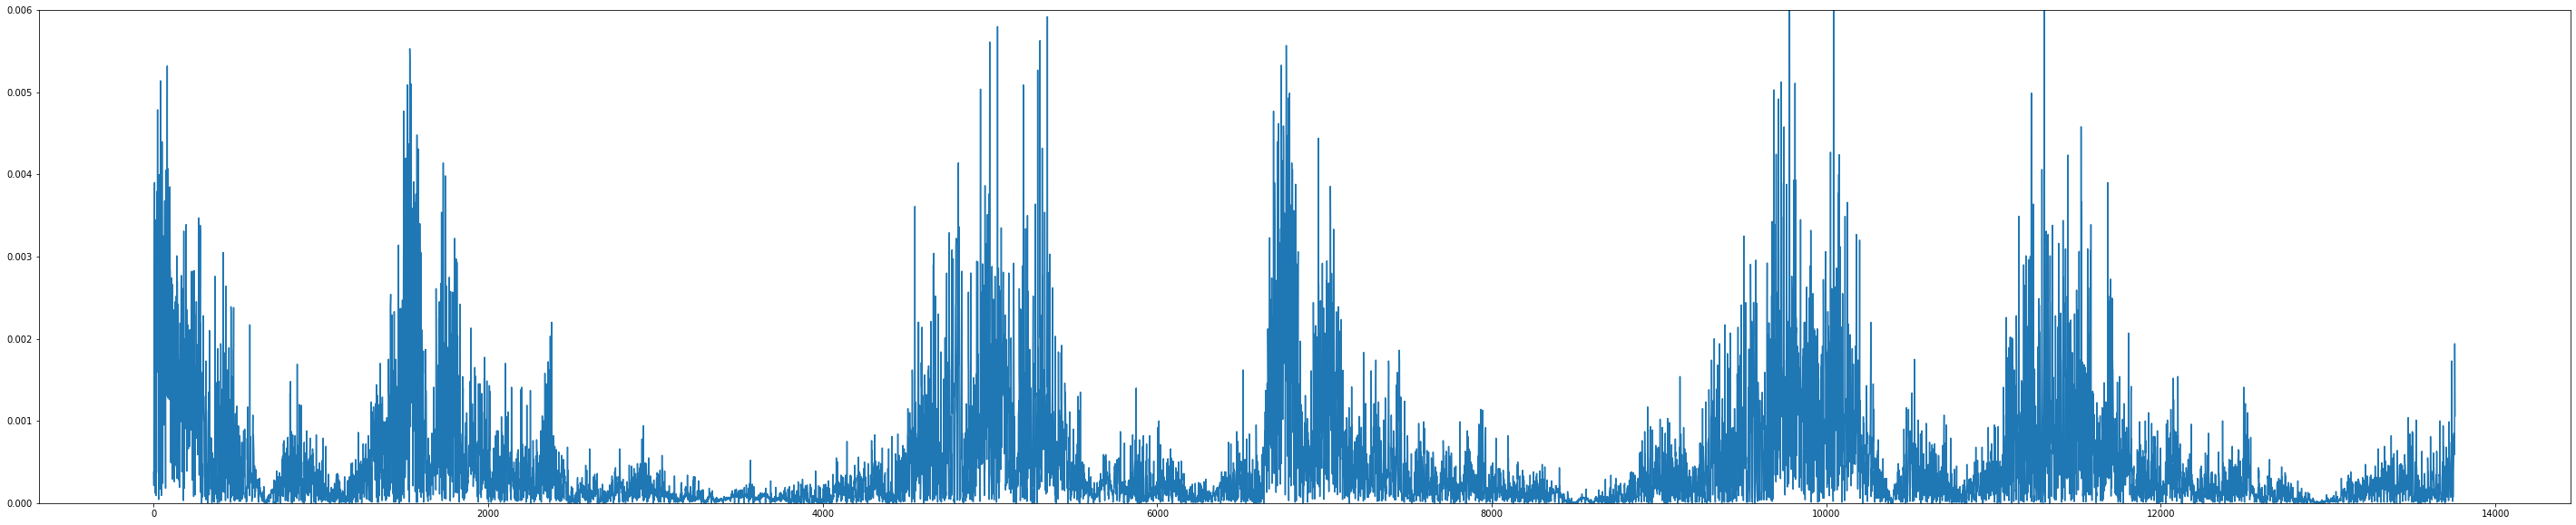

In [313]:
plt.figure(figsize=(50, 10))
plt.plot(df_y[degree:-degree])
plt.ylim(0, 0.006)

In [314]:
df_y_smooth = pd.DataFrame(y_smooth[degree:-degree])
df_y_smooth

,0
0,8.527721
1,8.566054
2,8.607929
3,8.638971
4,8.637096
...,...
13755,3.192083
13756,3.215833
13757,3.244167
13758,3.253125


In [321]:
x_train, x_test, y_train, y_test = train_test_split(df_x_smooth, df_y_smooth, test_size = 0.2, shuffle = False)

# Neural Network

C:\Users\eric_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(0, 10)

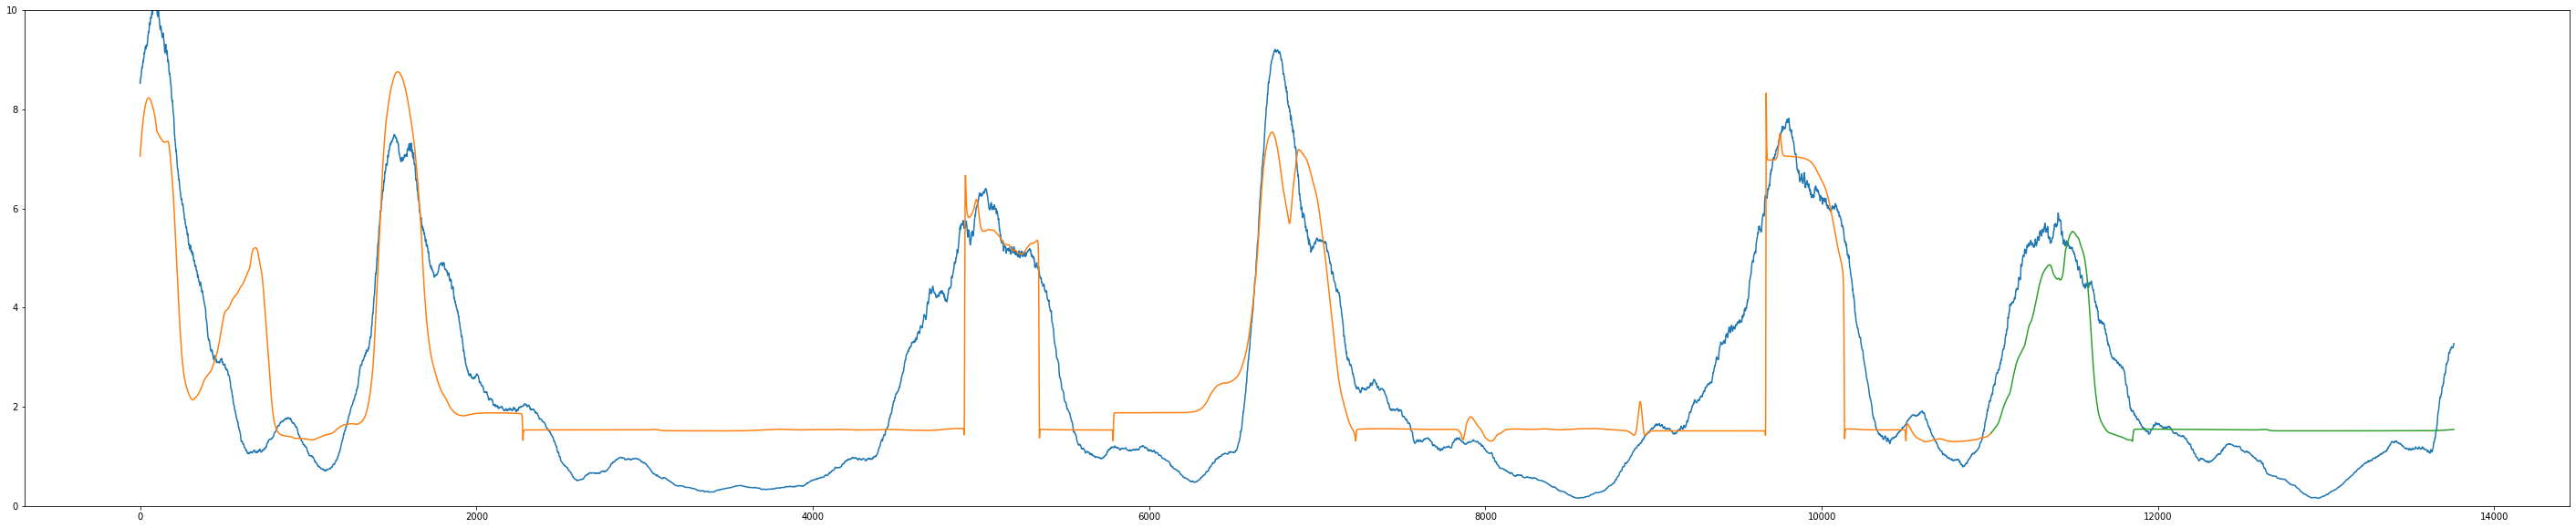

In [345]:
total_length = len(df_y_smooth)
train_length = len(y_train)
x = [i for i in range(total_length)]
nn = MLPRegressor(activation = 'logistic', solver = 'lbfgs', hidden_layer_sizes = (25,25,25), random_state = 1, max_iter = 500)
nn.fit(x_train,y_train.values.ravel())
pred = nn.predict(x_test)
pred_train = nn.predict(x_train)
plt.figure(figsize=(50, 10))
plt.plot(x,df_y_smooth,label = 'true y')
plt.plot(x[:train_length], pred_train, label = 'predict x_train')
plt.plot(x[train_length:], pred, label = 'predict x_test')
plt.ylim(0, 10)

In [343]:
mse = mean_squared_error(y_test, pred)
mse

0.8677579409726476

C:\Users\eric_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(0, 10)

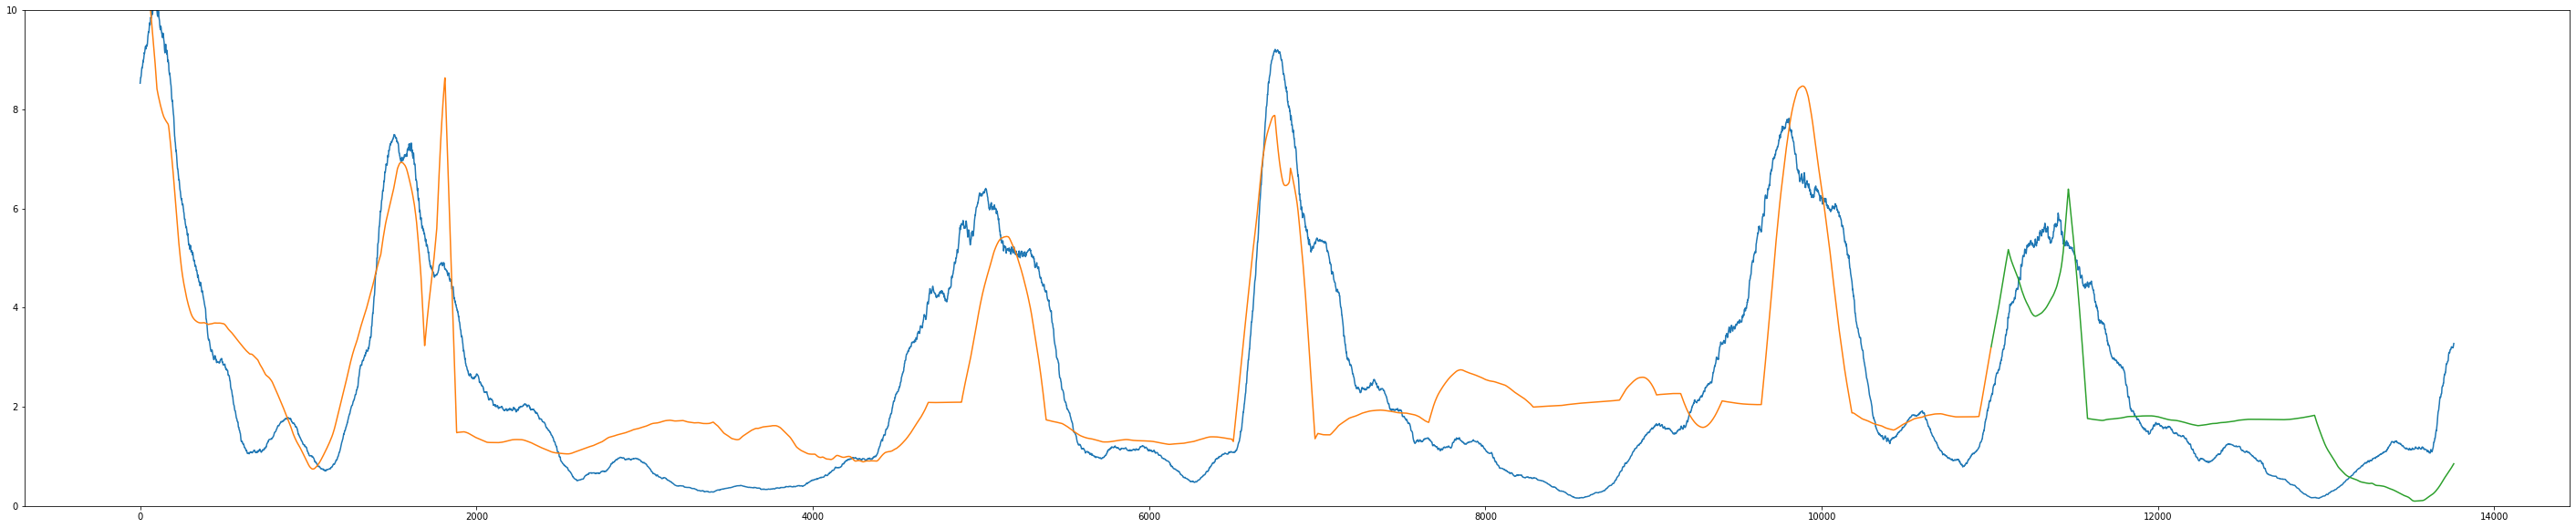

In [346]:
total_length = len(df_y_smooth)
train_length = len(y_train)
x = [i for i in range(total_length)]
nn = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = (25,25,25), random_state = 1, max_iter = 500)
nn.fit(x_train,y_train.values.ravel())
pred = nn.predict(x_test)
pred_train = nn.predict(x_train)
plt.figure(figsize=(50, 10))
plt.plot(x,df_y_smooth,label = 'true y')
plt.plot(x[:train_length], pred_train, label = 'predict x_train')
plt.plot(x[train_length:], pred, label = 'predict x_test')
plt.ylim(0, 10)

In [326]:
mse = mean_squared_error(y_test, pred)
mse

1.185839061610946

# Linear Regression

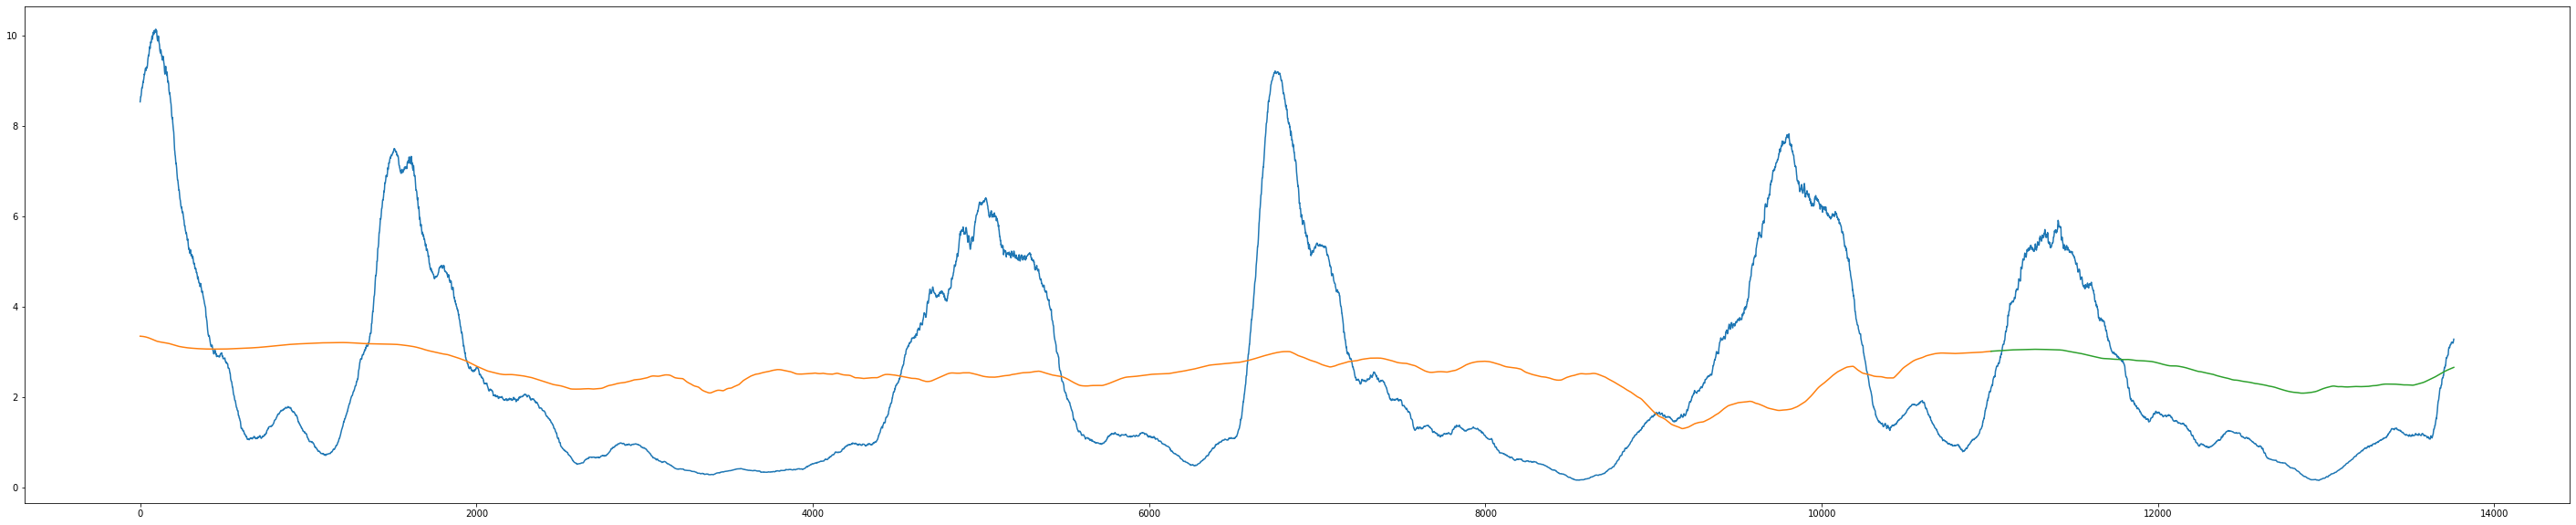

In [347]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train.values.ravel())
pred_train = reg.predict(x_train)
pred = reg.predict(x_test)
plt.figure(figsize=(50, 10))
plt.plot(x,df_y_smooth,label = 'true y')
plt.plot(x[:train_length], pred_train, label = 'predict x_train')
plt.plot(x[train_length:], pred, label = 'predict x_test')

In [260]:
mse = mean_squared_error(y_test, pred)
mse

2.2001033305689295

In [2107]:
reg.coef_

array([ 0.00011018, -0.00024332, -0.00012792])

# Validation

In [2108]:
pred = nn.predict(x_test)

In [2109]:
pred_train = nn.predict(x_train)

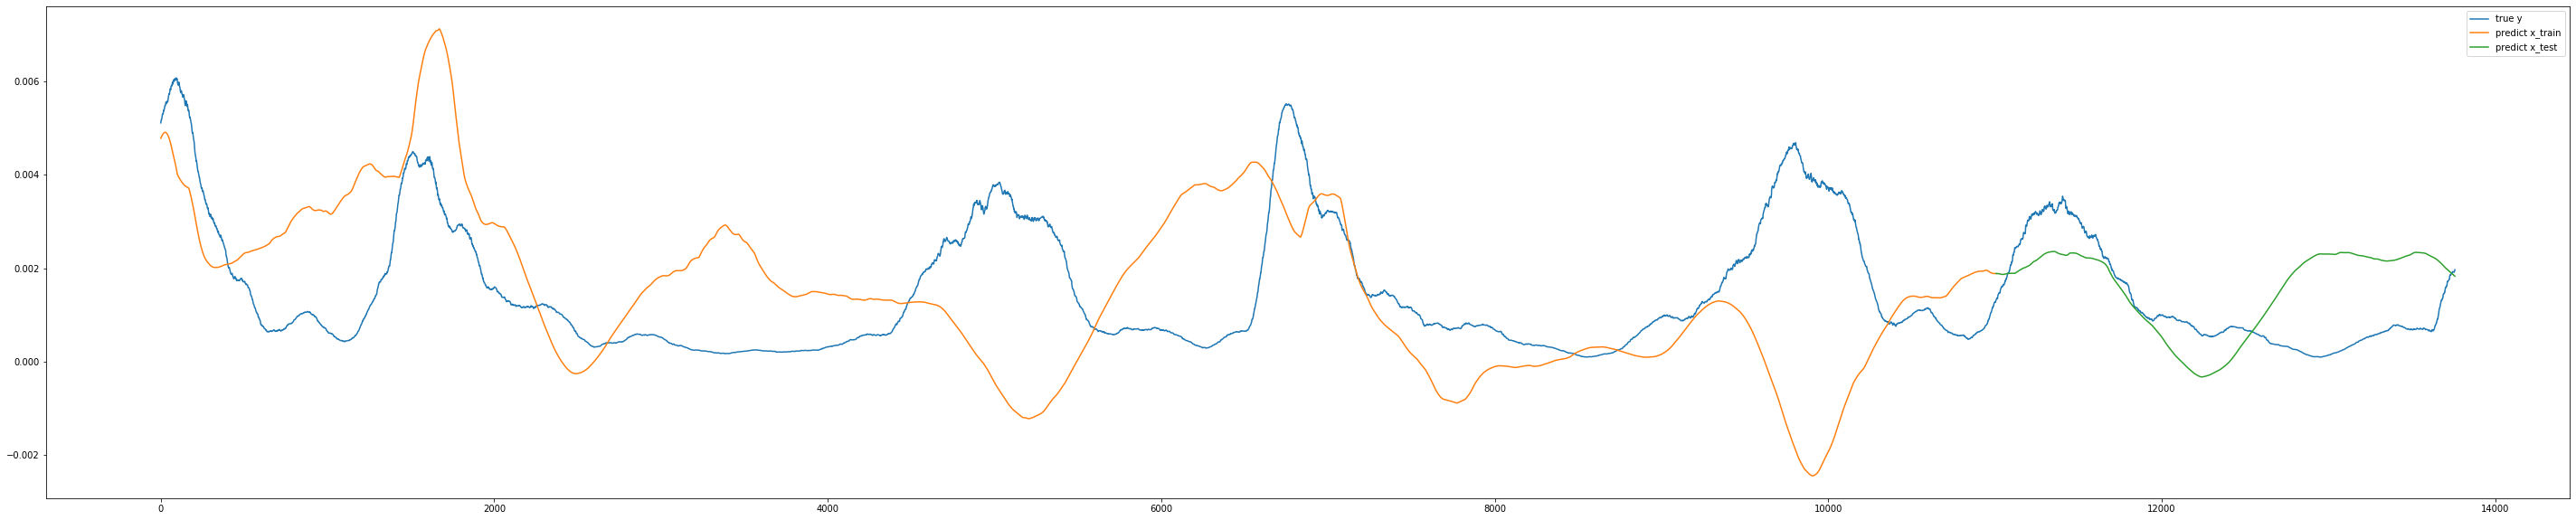

In [2119]:
total_length = len(df_y_smooth)
train_length = len(y_train)
x = [i for i in range(total_length)]
plt.figure(figsize=(50, 10))
plt.plot(x,df_y_smooth,label = 'true y')
plt.plot(x[:train_length], pred_train, label = 'predict x_train')
plt.plot(x[train_length:], pred, label = 'predict x_test')
plt.legend()

In [2117]:
mean_squared_error(y_train, pred_train)

4.501484362436723e-06